In [1]:
#IMPORTING THE LIBRARIES
import random as rd
import numpy as np 
import matplotlib.pyplot as plt 
import statistics as stat
import math
from math import *
import pandas as pd
from scipy import integrate as intg
from scipy.stats import linregress
import scipy
from scipy.integrate import quad
import warnings
import scipy.stats as si
np.seterr(divide='ignore', invalid='ignore')
import scipy.integrate as integrate
from scipy.special import gamma
from tqdm import tqdm
import scipy.fft as fft
import scipy.interpolate as interpolate
import cmath
import scipy
warnings.filterwarnings('ignore')
from utils import *

In [26]:
%%time
t, c, x, tau = 0, np.array([0.5,0.4]), np.array([1,0.5]), 1/12
Ut = np.array([0,0])
rho, lamb,theta,nu,V0 = -0.7,0.3,0.02,0.3,0.01

print(np.sqrt(squared_VIX(t, c, x, V0,Ut,lamb,theta,nu,rho, 1/12)))
print(np.sqrt(squared_VIX(t, c, x, V0,Ut,lamb,theta,nu,rho, 1/6)))

[10.05450137]
[10.10568377]
CPU times: user 4.27 ms, sys: 4.47 ms, total: 8.74 ms
Wall time: 4.08 ms


## VIX

In [27]:
# rough heston parameters, with alpha = H+0.5
rho,lamb,theta,nu,V0, alpha = -0.7,0.3,0.02,0.3,0.01, 0.6
S0,T = 1, 1/12
n,rn = 20, 2.5

In [28]:
c,x = vec_c(n,rn,alpha), vec_x(n,rn,alpha)
Ut = np.zeros_like(c)
VIX2 = squared_VIX(0, c, x, V0,Ut,lamb,theta,nu,rho, 1/12)
VIX_analytical  = np.sqrt(VIX2)
VIX_analytical

array([10.21686562])

In [29]:
c,x = vec_c(n,rn,alpha), vec_x(n,rn,alpha)
Ut = np.zeros_like(c)
VIX2 = squared_VIX(0, c, x, V0,Ut,lamb,theta,nu,rho, 6/12)
VIX_analytical  = np.sqrt(VIX2)
VIX_analytical

array([10.58324969])

## VIX term structure

6it [00:00, 511.59it/s]

n:  20


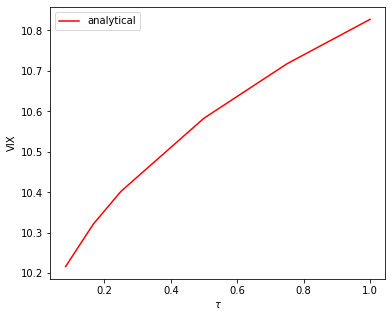

In [30]:
tau_ = np.array([1/12,2/12,3/12,6/12,9/12,12/12])
VIX_analytical = np.ones_like(tau_)
for idx,tau_i in tqdm(enumerate(tau_)):
    VIX2 = squared_VIX(0, c, x, V0,Ut,lamb,theta,nu,rho, tau_i)
    VIX_analytical[idx] = np.sqrt(VIX2)
print('n: ', n)
plt.figure(figsize=(6,5))
plt.plot(tau_,VIX_analytical, color='red', label='analytical')
plt.xlabel('$\\tau$')
plt.ylabel('VIX')
plt.legend()

In [31]:
## to be imported by rHestonMGF.ipynb
VIX_analytical

array([10.21686562, 10.32160831, 10.40255711, 10.58324969, 10.71777409,
       10.8274753 ])